# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Оценки параметров и сбор данных.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Работы, присланные иным способом, не принимаются.
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате ipynb и **в формате html**, который можно получить как `File -> Download as -> HTML`.
* Теоретические задачи необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив;
  * фотографией, **встроенной в ноутбук** посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Теоретические задачи не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта. Неправильно вставленные фотографии могут не передаться при отправке.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 3 балла
* Задача 2 &mdash; 5 баллов
* Задача 3 &mdash; 12 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 4 &mdash; 6 баллов
* Задача 5 &mdash; 10 баллов

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

import requests
from time import sleep
import json

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.   

**a).** Пусть $X_1,...,X_n$ выборка из некоторого распределения $\mathsf{P}$, причем ${\sf D} X_1=\sigma^2<+\infty$, и $\sigma$ неизвестно. 
Рассмотрим оценку $S^2 = \overline{X^2}-\overline{X}^2$ дисперсии $\sigma^2$.

Докажите, что $S^2=\frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2$.

**b).** Оценка $\widehat{\theta}$ называется несмещенной оценкой параметра $\theta$ если для любого $\theta \in \Theta$ выполнено $\mathsf{E}_\theta \widehat{\theta} = \theta$. Иначе говоря, какое бы ни оказалось истинное значение параметра $\theta$ рассматривая оценку $\widehat{\theta}$ в среднем будем получать именно $\theta$.

Является ли статистика $S^2$ несмещенной оценкой $\sigma^2$?

*Подсказка.* Посчитайте математическое ожидание случайной величины $S^2$. Используйте для этого известные вам свойства математического ожидания.

**a)** Докажем, что $$\overline{X^2}-\overline{X}^2 = \frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2.$$
Вспомним, что $\overline{x}^2 = (\frac1n\cdot(x_1 + \dots + x_n))^2$, $\overline{x^2} = \frac1n(x_1^2 + \dots + x_n^2)$. Теперь раскроем левую часть доказываемого утверждения: 
$$\frac1n\cdot(x_1^2 + \dots + x_n^2) - \frac1n\cdot\frac1n(x_1 + \dots + x_n)^2.$$
Сократим левую и правую части доказываемого утверждения на $\frac1n$:
\begin{gather*}
\frac1n\cdot(x_1^2 + \dots + x_n^2) - \frac1n\cdot\frac1n(x_1 + \dots + x_n)^2 = \frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2 \\
(x_1^2 + \dots + x_n^2) - \cdot\frac1n(x_1 + \dots + x_n)^2 = \sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2
\end{gather*}

Тепер раскроем правую часть: $\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2 = \sum\limits_{i=1}^n(x_i^2 - 2x_i\overline{x} + \overline{x}^2) = (x_1^2 + \dots + x_n^2) - 2\overline{x}(x_1 + \dots + x_n) + n\cdot\overline{x}^2$.

Теперь сократим вычтем из обоих частей сумму квадратов, а затем умножим обе части на $(-n)$:
\begin{gather*}
(x_1^2 + \dots + x_n^2) - \cdot\frac1n(x_1 + \dots + x_n)^2 = (x_1^2 + \dots + x_n^2) - 2\overline{x}(x_1 + \dots + x_n) + n\cdot\overline{x}^2 \\ 
(x_1 + \dots + x_n)^2 = 2n\overline{x}(x_1 + \dots + x_n) - n^2\cdot\overline{x}^2
\end{gather*}

Раскроем $\overline{x} = \frac1n(x_1 + \dots + x_n)$:
\begin{gather*}
(x_1 + \dots + x_n)^2 = 2n\frac1n(x_1 + \dots + x_n)(x_1 + \dots + x_n) - n^2\cdot\overline{x}^2 \\
(x_1 + \dots + x_n)^2 = 2(x_1 + \dots + x_n)^2 - n^2\cdot\overline{x}^2 \\ 
(x_1 + \dots + x_n)^2 = n^2 \overline{x}^2.
\end{gather*}

Еще раз раскроем $\overline{x} = \frac1n(x_1 + \dots + x_n)$:
\begin{gather*}
(x_1 + \dots + x_n)^2 = (x_1 + \dots + x_n)^2.
\end{gather*}

**b)** Вспомним, что $\mathsf{D}x_1 = \mathsf{E}x_1^2 - (\mathsf{E}x_1)^2 = \sigma^2$. Отсюда $\mathsf{E}x_1^2 = (\mathsf{E}x_1)^2 + \sigma^2$.
Посчитаем $\mathsf{E}S^2$, воспользовавшись пунктом **a)**. 
$$\mathsf{E}\left(\frac1n \sum\limits_{i=1}^n(x_i - \overline{x})^2\right) = \frac1n \cdot \sum\limits_{i=0}^n \mathsf{E}(x_i - \overline{x})^2 = \frac1n \cdot \sum\limits_{i=0}^n (\mathsf{E}x_i^2 - 2\overline{x}\mathsf{E}x_i + \overline{x}^2) = \mathsf{E}x_1^2 - 2\overline{x}\mathsf{x_1} + \overline{x}^2.
$$
Теперь подставим $\mathsf{E}x_1^2 = (\mathsf{E}x_1)^2 + \sigma^2$:
$$
\mathsf{E}x_1^2 - 2\overline{x}\mathsf{x_1} + \overline{x}^2 = (\mathsf{E}x_1)^2 + \sigma^2 - 2\overline{x}\mathsf{x_1} + \overline{x}^2 = (\mathsf{E}x_1 - \overline{x})^2 + \sigma^2
$$
Значит, что статистика $S^2$ является несмещенной оценкой $\sigma^2$, если $\mathsf{E}x_1 = \overline{x}$.

 ---
### Задача 2.   
Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $\mathcal{N}(0, \sigma^2)$. В качестве оценок $\sigma^2$ обычно используют $S^2$ или $\frac{n}{n-1}S^2$. Что можно сказать про их несмещенность?

**Ответ:** <...>

**1.** Теперь проверьте это на практике. Для каждой из приведенных выше оценок $\widehat{\theta}$ выполните следующие действия.

* Вычислите $k = 500$ независимых оценок $\widehat{\theta}_1, ... , \widehat{\theta}_k$ по независимым выборкам $(X_1^1, ... , X_n^1), ... , (X_1^k, ... , X_n^k)$, сгенерированным из распределения $\mathcal{N}(0, \sigma^2)$. Далее вычислите среднее этих оценок, которое обозначим $\overline{\theta}$.

* Визуализируйте полученные значения, построив на **одном** графике точки $(\widehat{\theta}_1, $y$), ... , (\widehat{\theta}_k, y)$ и среднее оценок $(\overline{\theta}, y)$, где $y$ &mdash; произвольные различные (например 0, 1, 2) координаты для двух различных типов оценок.

* Повторите действие три раза для $n \in \{10, 100, 500\}$. В итоге получится три графика для различных $n$, на каждом из которых изображено поведение двух типов оценок и их среднее.

Используйте приведенный ниже **шаблон** для визуализации значений.

**Внимание!** Следите за информативностью и наглядностью графиков. Например, пустых пространств должно быть как можно меньше, ничего не должно быть скомкано, вся нужная информация должна быть представлена. Посмотрите также презентацию с разбора задания 1. **Если график чему-то не удовлетворяет, оценка может быть снижена.**

Вместо использования `matplotlib` можно также строить графики с помощью `plotly`.

In [2]:
# Вначале:
plt.figure(figsize=<размер>)

# Для каждой оценки:
plt.scatter(<независимые оценки> , np.zeros(k) + y, 
            alpha=0.1, s=100, color=<цвет>, label=<метка>)
plt.scatter(<независимые оценки>.mean(), y, marker='*', s=200, 
            color='w', edgecolors='black')

# Для всего графика:
plt.vlines(1, <наименьший y>, <наибольший y>, color='r')
plt.title(f'Размер выборки = {k}')
plt.yticks([])
plt.legend()

SyntaxError: invalid syntax (<ipython-input-2-1e53d4df5751>, line 2)

**Решение:**

In [3]:
...

Ellipsis

**2.** Изучим поведение среднего оценок из первого пункта при росте размера выборки. Постройте график зависимости $\overline{\theta}$ от $n$ для двух типов оценок. Для вычисления зависимости нужно один раз сгенерировать выборки из пункта 1 достаточно большого размера (не более 500) и посчитать оценки по подвыборкам, используя <a href="https://mipt-stats.gitlab.io/courses/python/05_numpy.html#2.1-Математические-операции">функции</a> из `numpy`. Использовать циклы, а так же функции, разворачивающиеся в цикл (например, `np.vectorize`), запрещено. Какие из оценок являются асимптотически несмещёнными, т.е. $\forall \theta \in \Theta\colon \mathsf{E}_\theta \widehat{\theta} \to \theta$ при $n\to +\infty$?

**Решение:**

In [ ]:
...

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты полученное в теоретических задачах свойство несмещенности (или отсутствие этого свойства) данных оценок? Поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

**Вывод:** 

In [ ]:
...

*Замечание.* Проведенные эксперименты позволяют сделать вывод только о поведении среднего значения оценки, но ничего не говорят о том, насколько велик их разброс относительно среднего.

 ---
### Задача 3.   

В этой задаче вам нужно будет проанализировать вакансии на сайте <a target="_blank" href="https://hh.ru/">hh.ru</a>. Для сбора данных рекомендуется использовать <a target="_blank" href="https://dev.hh.ru/">официальное API</a>.

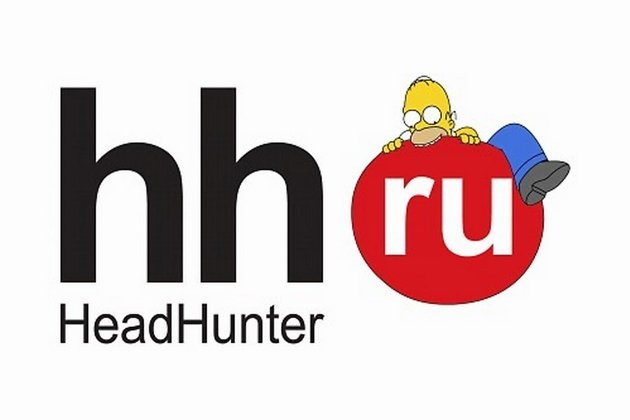

**1. Сбор данных**

Соберите данные о вакансии Data Scientist по Москве в одну таблицу и подготовьте их для анализа. Часто в индустрии подготовленные для анализа таблицы называют *витринами*. В ней должны быть:
- название вакансии,
- работодатель,
- зарплатная вилка,
- станция метро,
- ссылка на вакансию,
- опыт,
- требуемые навыки,
- что-то еще по вашему желанию.

Креативность приветствуется. При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. 

**При работе с API не забывайте делать паузы между запросами, чтобы не задудосить сервер HeadHunter.**

Пример запроса к API:

In [6]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Data Scientist",
    'area': 1,
    'page': 5,
    'per_page': 100
}

req = requests.get(URL, params)
data = json.loads(req.content.decode())
# data['pages']
# [i['name'] for i in data['items']]

In [7]:
data['items'] ##. ['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url']

# a = [i for i in data['items']]
# a ##  43896076
# a[2]

[]

In [8]:
URL = 'https://api.hh.ru/vacancies'

vacancies = []
name = "Data Scientist"
city_id = 1 ##. Moscow
i = 0
while True:
    params = {
        'text': name,
        'area': city_id,
        'page': i,
        'per_page': 100
    }
    i += 1
    req = requests.get(URL, params)
    data = json.loads(req.content.decode())
    if data['items'] == []:
        break
    vacancies += data['items']
    sleep(2)


In [9]:
vacancies[5]

{'id': '42683816',
 'premium': False,
 'name': 'Data Scientist',
 'department': None,
 'has_test': False,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 180000, 'to': 250000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': '5-я Магистральная улица',
  'building': '3с1',
  'description': None,
  'lat': 55.771353,
  'lng': 37.52466,
  'raw': 'Москва, 5-я Магистральная улица, 3с1',
  'metro': None,
  'metro_stations': [],
  'id': '4785972'},
 'response_url': None,
 'sort_point_distance': None,
 'published_at': '2021-04-24T09:54:37+0300',
 'created_at': '2021-04-24T09:54:37+0300',
 'archived': False,
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=42683816',
 'insider_interview': None,
 'url': 'https://api.hh.ru/vacancies/42683816?host=hh.ru',
 'alternate_url': 'https://hh.ru/vacancy/42683816',
 'relatio

In [13]:
data = {
    'name': [], 
    'employer': [], 
    'salary_from': [], 
    'salary_to': [], 
    'salary_currency': [], 
    'salary_gross': [], 
    'metro': [],
    'link': [],
    'experience': [],
    'req_skills': [],
    'description': []
}
data

{'name': [],
 'employer': [],
 'salary_from': [],
 'salary_to': [],
 'salary_currency': [],
 'salary_gross': [],
 'metro': [],
 'link': [],
 'experience': [],
 'req_skills': [],
 'description': []}

In [14]:
for vacancy in vacancies:
    try:
        data['name'].append(vacancy['name'])
    except KeyError:
        data['name'].append(None)
    try:
        data['employer'].append(vacancy['employer']['name'])
    except KeyError:
        data['employer'].append(None)
    
        
    #     'salary': {'from': 180000, 'to': 250000, 'currency': 'RUR', 'gross': True},
    for salary_name in ['salary_from', 'salary_to', 'salary_currency', 'salary_gross']:
        try:
            data[salary_name].append(vacancy['salary'][salary_name.split('_')[-1]])
        except KeyError:
            data[salary_name].append(None)
        except TypeError:
            data[salary_name].append(None)
    try:
        data['metro'].append(vacancy['address']['metro']['station_name'])
    except KeyError:
        data['metro'].append(None)
    except TypeError:
        data['metro'].append(None)

    try:
        data['link'].append(vacancy['apply_alternate_url'])
    except KeyError:
        data['link'].append(None)
    
    
    req = requests.get(vacancy['url'])
    special_info = json.loads(req.content.decode())
    try:
        data['experience'].append(special_info['experience']['name'])
    except KeyError:
        data['experience'].append(None)
    try:
        data['req_skills'].append(', '.join([i['name'] for i in special_info['key_skills']]))
    except KeyError:
        data['req_skills'].append(None)
    try:
        data['description'].append(special_info['description'])    
    except KeyError:
        data['description'].append(None)
    sleep(0.5)

In [15]:
data

{'name': ['Стажер data scientist',
  'Аналитик\xa0Data Scientist',
  'Data Scientist в области компьютерного зрения',
  'Data Scientist / Quantitative Researcher',
  'Junior Data Scientist',
  'Data Scientist',
  'Data scientists, Младший (Junior)',
  'Data Scientist',
  'Senior Data Scientist /Quantitative Analyst (Кипр)',
  'CV Senior Data Scientist',
  'Data Scientist / Аналитик Data Science',
  'Data Analyst',
  'Data scientist',
  'Data scientist (ML/Python)',
  'Data scientist',
  'Data Scientist',
  'Аналитик данных/ Data Scientist',
  'Data Scientist',
  'Data scientist/Бизнес-аналитик (Junior/Middle) в консалтинг',
  'Аналитик-разработчик (Data Scientist)',
  'Data scientist (NLP)',
  'Data scientist',
  'Team Lead/Senior Data Scientist',
  'Data Scientist в команду прогнозирования спроса Яндекс.Маркета',
  'Data Scientist',
  'Senior Data Scientist',
  'Ведущий аналитик Data scientist',
  'Teamlead Data scientist',
  'Data Engineer',
  'Data Scientist (computer vision)',
  'D

In [16]:
df = pd.DataFrame(data)
df.head()

,name,employer,salary_from,salary_to,salary_currency,salary_gross,metro,link,experience,req_skills,description
0,Стажер data scientist,"СИБУР, Группа компаний",NaN,NaN,None,None,None,https://hh.ru/applicant/vacancy_response?vacan...,Нет опыта,"Python, SQL, R, machine learning",<p><strong>О НАС:</strong></p> <ul> <li>Одно и...
1,Аналитик Data Scientist,Стоматорг,180000.0,250000.0,RUR,True,None,https://hh.ru/applicant/vacancy_response?vacan...,От 1 года до 3 лет,"Python, MS Visio, Бизнес-анализ, Аналитические...",<p><em><strong>Компания Стоматорг - первая час...
2,Data Scientist в области компьютерного зрения,Fair Print & High Store,150000.0,150000.0,RUR,False,None,https://hh.ru/applicant/vacancy_response?vacan...,Нет опыта,"C++, Тестирование, MATLAB, Гарант плюс, Бизнес...",<p>Стоимость работ: 150 000 рублей.</p> <p>Сро...
3,Data Scientist / Quantitative Researcher,Знаменка Капитал,250000.0,NaN,RUR,True,Кропоткинская,https://hh.ru/applicant/vacancy_response?vacan...,От 3 до 6 лет,"Mathematical Statistics, Mathematical Programm...",<strong>Обязанности:</strong> <ul> <li>Разрабо...
4,Junior Data Scientist,Институт прикладных экономических исследований...,120000.0,NaN,RUR,True,Юго-Западная,https://hh.ru/applicant/vacancy_response?vacan...,От 1 года до 3 лет,"PyTorch, TensorFlow, Scikit-learn, xgboost, Py...",<p><strong>Лаборатории анализа данных и отрасл...


**2. Анализ и визуализация данных**

Проведите исследование получившихся данных. Прежде всего убедитесь, что ваши данные чистые. Убедитесь, что вы проделали следующее:
- удаление дубликатов,
- предобработка пропусков,
- предобработка текстовых данных.

Среди вакансий можно выделять группы. *Например*, бизнес-аналитик, BI аналитик, продуктовый аналитик.

Ответьте не следующие вопросы:  
- Сколько сейчас доступно вакансий по вашему запросу?
- Выделяются ли среди вакансий какие-то группы? 
- Какие группы вакансий самые популярные?
- Какова средняя и медианная заработная плата?
- Какие ключевые навыки требуются для данной вакансии?
- Какой опыт требуется для данной вакансии?
- Какие работодатели в топе? 
- В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?

Не забудьте про визуализацию &mdash; для этого используйте библиотеку plotly. Постройте следующие графики:
- гистограмма распределения заработной платы;
- heatmap, отображающий зависимость количества вакансий от группы и навыка;
- зависимость средней заработной платы от требуемых навыков;
- распределение средней заработной платы по карте Москвы;
- распределение спроса на вакансию по карте Москвы.

Для построения последних двух графиков вам могут понадобиться <a target="_blank" href="http://www.lovrikinfo.ru/metrogps.php">внешние данные</a>.


In [17]:
df = df.drop_duplicates()

In [18]:
print(f'Сейчас доступно {len(df)} вакансий по вашему {name}')

Сейчас доступно 327 вакансий по вашему Data Scientist


- Выделяются ли среди вакансий какие-то группы? 

In [19]:
junior_cnt = 0
middle_cnt = 0
senior_cnt = 0
for i in list(df['name']):
    if 'junior' in i.lower():
        junior_cnt += 1
    if 'middle' in i.lower():
        middle_cnt += 1
    if 'senior' in i.lower():
        senior_cnt += 1
print(junior_cnt, middle_cnt, senior_cnt)

11 23 56


Да, например, выделяются группы по уровню скилла. Но не только по этому признаку есть группы.

- Какие группы вакансий самые популярные?

In [28]:
groups = [
    {'name': 'Analyst', 'words': ['аналитик', 'analyst'], 'cnt':0},
    {'name': 'Engineer', 'words': ['engineer'], 'cnt':0},
    {'name': 'ML', 'words': ['ml', 'machine', 'машин', 'обучение'], 'cnt':0},
    {'name': 'бизнес', 'words': ['бизнес', 'business'], 'cnt':0},
    {'name': 'Computer vision(CV)', 'words': ['cv', 'computer', 'vision', 'зрение', 'компьютерн'], 'cnt':0},
    {'name': 'NLP', 'words': ['nlp'], 'cnt':0},
    {'name': 'Big Data', 'words': ['big data', 'ббольш', 'данны'], 'cnt':0},
    {'name': 'Researcher', 'words': ['researcher'], 'cnt':0}
         ]

In [29]:
j = 0
for index, row in df.iterrows():
    for i in range(len(groups)):
        group = groups[i]
        for word in group['words']:
            if word in row[0].lower():
                groups[i]['cnt'] += 1


groups.sort(key=lambda x: x['cnt'])

for group in groups:
    print(f"{group['cnt']} вакансий в группе {group['name']}")

6 вакансий в группе Researcher
7 вакансий в группе бизнес
15 вакансий в группе NLP
16 вакансий в группе Computer vision(CV)
22 вакансий в группе Big Data
23 вакансий в группе ML
42 вакансий в группе Analyst
43 вакансий в группе Engineer


Самые популярные вакансии - **аналитики**.

- Какова средняя и медианная заработная плата?

In [115]:
df['salary_mean'] = (df['salary_from'] + df['salary_to']) / 2

In [31]:
df['salary_mean'].describe()

count        19.000000
mean     109736.842105
std       94254.548729
min        3000.000000
25%        4750.000000
50%      130000.000000
75%      200000.000000
max      225000.000000
Name: salary_mean, dtype: float64

In [32]:
df['salary_mean'].median()

130000.0

- Какие ключевые навыки требуются для данной вакансии?

In [33]:

skills = {}

for index, row in df.iterrows():
#     print(row[9])
    cur_skills = row[9].split(', ')
    for skill in cur_skills:
        if skill not in skills:
            skills[skill] = 0
        skills[skill] += 1
skills

{'Python': 186,
 'SQL': 119,
 'R': 7,
 'machine learning': 6,
 'MS Visio': 4,
 'Бизнес-анализ': 7,
 'Аналитические исследования': 9,
 'ML-фреймворков (TensorFlow': 1,
 'PyTorch': 12,
 'NumPy);': 1,
 'C++': 24,
 'Тестирование': 4,
 'MATLAB': 8,
 'Гарант плюс': 1,
 'Бизнес-консультирование': 1,
 'машинное обучение': 1,
 'компьютерное зрение': 1,
 'программирование': 1,
 'Mathematical Statistics': 1,
 'Mathematical Programming': 1,
 'Mathematical Modeling': 1,
 'Big Data': 17,
 'Математическая статистика': 30,
 'количественные исследования': 1,
 'Статистический анализ': 16,
 'Математическое моделирование': 17,
 'TensorFlow': 10,
 'Scikit-learn': 1,
 'xgboost': 1,
 'Django Framework': 5,
 'PostgreSQL': 13,
 'Git': 33,
 'JavaScript': 3,
 'REST': 3,
 'GraphQL': 1,
 'Vue.js': 1,
 'Машинное обучение': 10,
 'Deep Learning': 5,
 'Нейронные сети': 2,
 'Computer Science': 2,
 'Прикладная математика': 2,
 'Анализ данных': 24,
 'Анализ временных рядов': 2,
 'язык R': 2,
 'Pyhton': 2,
 'Data Mining':

In [34]:
sorted_skills = []
for key, val in skills.items():
    if key == '':
        continue
    sorted_skills.append({'skill_name': key, 'cnt': val})
sorted_skills.sort(key = lambda x: x['cnt'], reverse=True)
sorted_skills

[{'skill_name': 'Python', 'cnt': 186},
 {'skill_name': 'SQL', 'cnt': 119},
 {'skill_name': 'Data Mining', 'cnt': 57},
 {'skill_name': 'Английский язык', 'cnt': 36},
 {'skill_name': 'Git', 'cnt': 33},
 {'skill_name': 'Linux', 'cnt': 32},
 {'skill_name': 'Математическая статистика', 'cnt': 30},
 {'skill_name': 'Spark', 'cnt': 26},
 {'skill_name': 'C++', 'cnt': 24},
 {'skill_name': 'Анализ данных', 'cnt': 24},
 {'skill_name': 'Hadoop', 'cnt': 22},
 {'skill_name': 'MS SQL', 'cnt': 20},
 {'skill_name': 'Big Data', 'cnt': 17},
 {'skill_name': 'Математическое моделирование', 'cnt': 17},
 {'skill_name': 'Machine Learning', 'cnt': 17},
 {'skill_name': 'Статистический анализ', 'cnt': 16},
 {'skill_name': 'Data Analysis', 'cnt': 15},
 {'skill_name': 'Java', 'cnt': 14},
 {'skill_name': 'PostgreSQL', 'cnt': 13},
 {'skill_name': 'Data Science', 'cnt': 13},
 {'skill_name': 'Работа в команде', 'cnt': 13},
 {'skill_name': 'PyTorch', 'cnt': 12},
 {'skill_name': 'NLP', 'cnt': 11},
 {'skill_name': 'SCALA'

Ключевыми навыками для Data Scientist являются python, sql, data mining, english.

- Какой опыт требуется для данной вакансии?

In [35]:
df.groupby('experience').size()

experience
Более 6 лет            13
Нет опыта              33
От 1 года до 3 лет    144
От 3 до 6 лет         137
dtype: int64

- Какие работодатели в топе? 

In [36]:
df.groupby('employer').size().sort_values(ascending=False)

employer
Сбербанк                  51
Ozon                       8
РАБЛЗ                      8
МегаФон                    6
Банк ВТБ (ПАО)             5
                          ..
Шлюмберже                  1
ОнТаргет ЛАБС              1
Нью Бизнес Текнолоджис     1
ВЕС-Медиа                  1
ABBYY                      1
Length: 172, dtype: int64

- В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?

In [37]:
df.groupby('metro').size().sort_values(ascending=False)

metro
Кутузовская               13
Маяковская                11
Деловой центр              7
Аэропорт                   6
Тульская                   5
Технопарк                  5
Павелецкая                 4
Белорусская                4
Балтийская                 3
Проспект Мира              3
Преображенская площадь     3
Калужская                  2
Лужники                    2
Динамо                     2
Ломоносовский проспект     2
Нагатинская                2
Немига                     2
Красносельская             2
Парк культуры              2
Перово                     2
Бауманская                 2
Профсоюзная                2
Баррикадная                2
Тушинская                  2
Академическая              2
Кропоткинская              1
Верхние Котлы              1
Выставочная                1
Дмитровская                1
Арбатская                  1
Каширская                  1
Алексеевская               1
Комсомольская              1
Юго-Западная               1
Марьина 

- гистограмма распределения заработной платы;

In [63]:
rus_df = df[(df['salary_currency'] != 'USD') & (df['salary_currency'] != 'EUR')]
rus_df

,name,employer,salary_from,salary_to,salary_currency,salary_gross,metro,link,experience,req_skills,description,salary_mean
0,Стажер data scientist,"СИБУР, Группа компаний",NaN,NaN,None,None,None,https://hh.ru/applicant/vacancy_response?vacan...,Нет опыта,"Python, SQL, R, machine learning",<p><strong>О НАС:</strong></p> <ul> <li>Одно и...,NaN
1,Аналитик Data Scientist,Стоматорг,180000.0,250000.0,RUR,True,None,https://hh.ru/applicant/vacancy_response?vacan...,От 1 года до 3 лет,"Python, MS Visio, Бизнес-анализ, Аналитические...",<p><em><strong>Компания Стоматорг - первая час...,215000.0
2,Data Scientist в области компьютерного зрения,Fair Print & High Store,150000.0,150000.0,RUR,False,None,https://hh.ru/applicant/vacancy_response?vacan...,Нет опыта,"C++, Тестирование, MATLAB, Гарант плюс, Бизнес...",<p>Стоимость работ: 150 000 рублей.</p> <p>Сро...,150000.0
3,Data Scientist / Quantitative Researcher,Знаменка Капитал,250000.0,NaN,RUR,True,Кропоткинская,https://hh.ru/applicant/vacancy_response?vacan...,От 3 до 6 лет,"Mathematical Statistics, Mathematical Programm...",<strong>Обязанности:</strong> <ul> <li>Разрабо...,NaN
4,Junior Data Scientist,Институт прикладных экономических исследований...,120000.0,NaN,RUR,True,Юго-Западная,https://hh.ru/applicant/vacancy_response?vacan...,От 1 года до 3 лет,"PyTorch, TensorFlow, Scikit-learn, xgboost, Py...",<p><strong>Лаборатории анализа данных и отрасл...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
322,Consumer Insights Client Consultant (Quantitat...,NielsenIQ,NaN,NaN,None,None,None,https://hh.ru/applicant/vacancy_response?vacan...,От 1 года до 3 лет,,<p><strong>MISSION </strong></p> <p>The main g...,NaN
323,Аналитик данных,ЛК Сименс Финанс,NaN,NaN,None,None,None,https://hh.ru/applicant/vacancy_response?vacan...,От 3 до 6 лет,"SQL, Английский язык, Статистический анализ, А...",<p>ООО ЛК «Сименс Финанс» (финансовое подразде...,NaN
324,"Client Consultant (market research, FMCG sector)",NielsenIQ,NaN,NaN,None,None,Тушинская,https://hh.ru/applicant/vacancy_response?vacan...,От 1 года до 3 лет,"Market Research, Маркетинговые исследования, А...",<p><strong>ABOUT THIS JOB</strong></p> <ul> <l...,NaN
325,Product Manager (Analytics),Segmento,NaN,NaN,None,None,None,https://hh.ru/applicant/vacancy_response?vacan...,От 3 до 6 лет,"Python, Agile Project Management, Scrum, Googl...",<p>Segmento – одна из крупнейших российских pr...,NaN


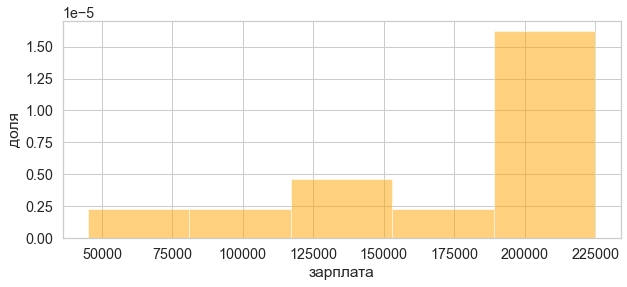

In [64]:
plt.figure(figsize=(10, 4))

sample = rus_df['salary_mean']


plt.hist(
    sample, 
    bins=5,
    density = True,
    alpha=0.5,
    color='orange'
)


plt.xlabel('зарплата')
plt.ylabel('доля')

plt.show()

- heatmap, отображающий зависимость количества вакансий от группы и навыка;

In [65]:
rus_df = rus_df.copy()

In [75]:
new_df = pd.DataFrame({'name': [], 'group': [], 'skill': []})
new_df
rus_df.head()
groups

[{'name': 'Researcher', 'words': ['researcher'], 'cnt': 6},
 {'name': 'бизнес', 'words': ['бизнес', 'business'], 'cnt': 7},
 {'name': 'NLP', 'words': ['nlp'], 'cnt': 15},
 {'name': 'Computer vision(CV)',
  'words': ['cv', 'computer', 'vision', 'зрение', 'компьютерн'],
  'cnt': 16},
 {'name': 'Big Data', 'words': ['big data', 'ббольш', 'данны'], 'cnt': 22},
 {'name': 'ML', 'words': ['ml', 'machine', 'машин', 'обучение'], 'cnt': 23},
 {'name': 'Analyst', 'words': ['аналитик', 'analyst'], 'cnt': 42},
 {'name': 'Engineer', 'words': ['engineer'], 'cnt': 43}]

In [76]:
for index, row in rus_df.iterrows():
    (
        name,
        employer,
        salary_from,
        salary_to,
        salary_currency,
        salary_gross,
        metro,
        link,
        experience,
        req_skills,
        description,
        salary_mean,
    ) = row
    cur_skills = req_skills.split(', ')
    cur_groups = []
    for group in groups:
        for word in group['words']:
            if word in req_skills:
                cur_groups.append(group)
    for group in cur_groups:
        for skill in cur_skills:
            new_df.loc[len(new_df)] = [name, group['name'], skill]
# for i in rus_df.columns:
#     print(i, end=',\n')
new_df

,name,group,skill
0,Стажер data scientist,ML,Python
1,Стажер data scientist,ML,SQL
2,Стажер data scientist,ML,R
3,Стажер data scientist,ML,machine learning
4,Data Scientist в области компьютерного зрения,Computer vision(CV),C++
...,...,...,...
504,Архитектор данных DWH,Big Data,SQL
505,Архитектор данных DWH,Big Data,Работа с базами данных
506,Архитектор данных DWH,Big Data,Базы данных
507,Архитектор данных DWH,Big Data,Анализ данных


In [94]:
abs_new_df = new_df.merge(rus_df, on='name', how='inner')
abs_new_df['cnt'] = 1
abs_new_df = abs_new_df[['name', 'group', 'skill', 'cnt']]
abs_new_df

,name,group,skill,cnt
0,Стажер data scientist,ML,Python,1
1,Стажер data scientist,ML,SQL,1
2,Стажер data scientist,ML,R,1
3,Стажер data scientist,ML,machine learning,1
4,Data Scientist в области компьютерного зрения,Computer vision(CV),C++,1
...,...,...,...,...
6032,Архитектор данных DWH,Big Data,SQL,1
6033,Архитектор данных DWH,Big Data,Работа с базами данных,1
6034,Архитектор данных DWH,Big Data,Базы данных,1
6035,Архитектор данных DWH,Big Data,Анализ данных,1


In [102]:
def f(row):
    for i in range(len(row)):
        if row[i] == None:
            row[i] = 0
    return row
data_table = pd.pivot_table(abs_new_df,
                values="cnt",
                index="skill", 
                columns="group", 
                aggfunc=np.sum)
data_table.fillna(0)

group,Analyst,Big Data,Computer vision(CV),Engineer,ML,бизнес
skill,,,,,,
.NET Framework,0.0,1.0,0.0,0.0,0.0,0.0
Agile Project Management,0.0,0.0,0.0,0.0,1.0,1.0
Analytical skills,0.0,1.0,0.0,0.0,1.0,0.0
Atlassian Jira,0.0,0.0,0.0,0.0,1.0,1.0
Big Data,4.0,55.0,0.0,4.0,1.0,0.0
...,...,...,...,...,...,...
Электронный документооборот,0.0,1.0,0.0,0.0,0.0,0.0
компьютерное зрение,0.0,0.0,2.0,0.0,2.0,0.0
машинное обучение,0.0,0.0,2.0,0.0,2.0,0.0


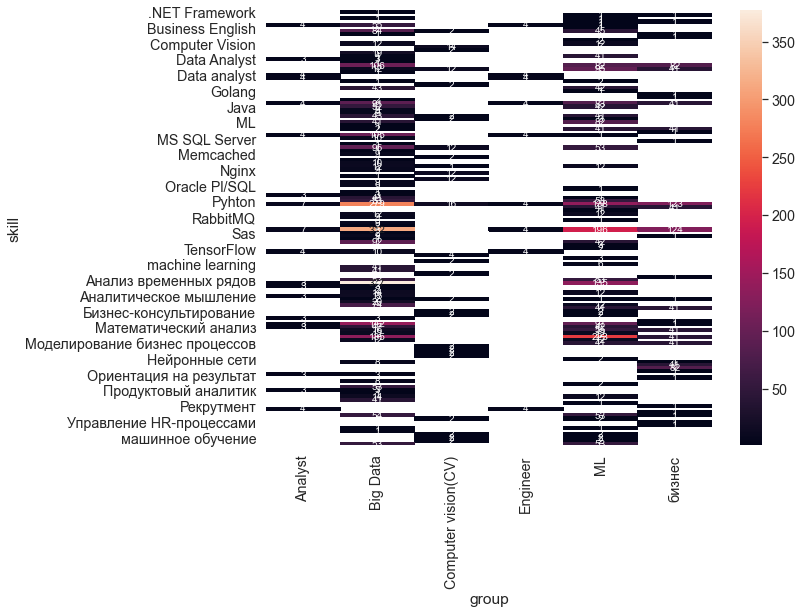

In [104]:
fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(data_table, ax=ax, annot=True, fmt=".0f")
plt.show()

- зависимость средней заработной платы от требуемых навыков;

In [125]:
abs_new_df = new_df.merge(rus_df, on='name', how='inner')
abs_new_df = abs_new_df[['name', 'group', 'skill', 'salary_mean']]
abs_new_df = abs_new_df.dropna(how='any')
abs_new_df

,name,group,skill,salary_mean
4,Data Scientist в области компьютерного зрения,Computer vision(CV),C++,150000.0
5,Data Scientist в области компьютерного зрения,Computer vision(CV),Тестирование,150000.0
6,Data Scientist в области компьютерного зрения,Computer vision(CV),MATLAB,150000.0
7,Data Scientist в области компьютерного зрения,Computer vision(CV),Гарант плюс,150000.0
8,Data Scientist в области компьютерного зрения,Computer vision(CV),Бизнес-консультирование,150000.0
...,...,...,...,...
5988,Head of HR,бизнес,Системный подход,225000.0
5989,Head of HR,бизнес,Управление HR-процессами,225000.0
5990,Head of HR,бизнес,Организаторские навыки,225000.0
5991,Head of HR,бизнес,Обучение и развитие,225000.0


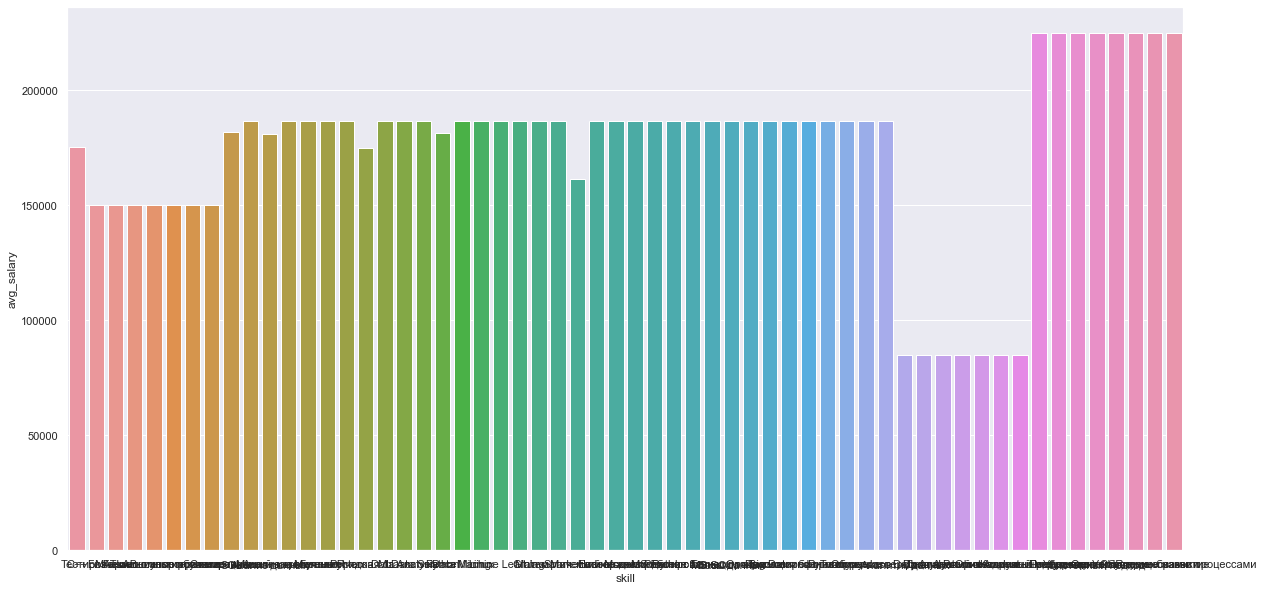

In [128]:
abs_new_df['avg_salary'] = abs_new_df.groupby('skill')['salary_mean'].transform(np.mean)
abs_new_df

info = abs_new_df[['skill', 'avg_salary']]
sns.barplot(x='skill', y='avg_salary', data=info)

sns.set(rc={'figure.figsize':(20, 10)})

Какие выводы можно сделать из построенных графиков?

<...>

**3. Анализ профессии, о которой вы мечтали в детстве**

Проведите аналогичное исследование для профессии, о которой вы мечтали в детстве. Это может быть повар, учитель, пожарный и т.д. &mdash; все зависит от вас ☺.

In [ ]:
...

**Замечание в тему.** Многие из вас наверняка сейчас уже начинают задумываться о работе. Конечно, вы имеете на это полное право. Однако, по нашему опыту работа на 3 курсе отрицательно сказывается на степени усвоения материала. По сути все предметы цикла Data Science у вас еще впереди. Подумайте, наверное, лучше разобраться во всем во время учебы, чем потом что-то где-то нагонять. Более простой вариант &mdash; летняя стажировка, но не забудьте отдохнуть, набравшись сил перед непростым 3 курсом ☺.


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 4.

Найдите оценку параметра $\theta$ методом моментов по выборке размера $n$ из распределения:
* $U(a, b), \theta=(a, b)$; 
* $Pois(\theta)$;
* $\mathcal{N}(a, \sigma^2), \theta=(a, \sigma)$.

---
### Задача 5.

В данной задаче вам предстоит распарсить сайт, который вы выберите.

**1.** Каждая ссылка (URL) в интернете состоит из нескольких компонент:

* схема, *например, `http` или `https`*,
* хост, *наример, `en.wikipedia.org`*
* путь, по которому находится информация,
* параметры,
* якорь &mdash; указание фрагмента страницы.

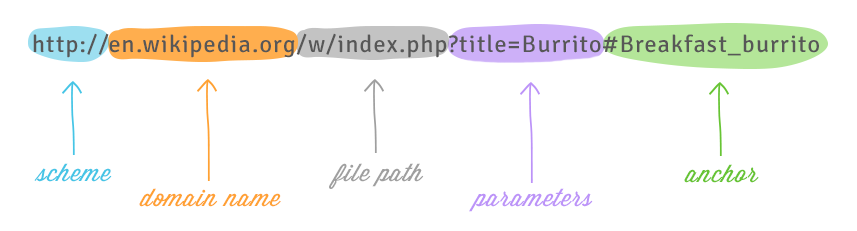

Одна и та же ссылка может иметь несколько форм и вести на ту же самую страницу. Во время обхода сайта это надо учитывать и сохранять один уникальный урл для каждой страницы. Процедура, приводящая урл к каноничному виду, называется нормализацией.
Процедуры, которые применяются к урлу для нормализации, описаны, например, на <a target="_blank" href="https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_URL">Википедии</a>.

Установите пакет `url_normalize`, в котором есть готовая функция для нормализации.

Прочитайте, как именно функция `url_normalize` меняет ссылку, и приведите примеры $4$ урлов, которые нормализуются к одному и тому же. Примеры должны демонстрировать различные этапы процедуры нормализации. Одним из этих примеров может быть сам нормализованный урл.

In [ ]:
from url_normalize import url_normalize

In [ ]:
...

_____________
Изучите код, в котором скачиваются страницы сайта `simple.wikipedia.org` с <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/data_parsing.html">занятия про парсинг данных</a>. Код, реализующий обход в ширину с фильтрацией и нормализацией урлов, приведён в виде функции.

In [ ]:
from urllib.parse import urlparse, urldefrag, urljoin
from urllib.request import urlopen
from bs4 import BeautifulSoup
from queue import Queue
import time

Код обхода в ширину:

In [ ]:
def load_web_pages(seed, max_downloads, filtration_function):
    '''Обходит web-страницы в ширину и загружает информацию о них.
    
    Принимает:
        seed (str) -- страница, с которой начинать обход.
        max_downloads (int) -- максимальное число загруженных страниц.
        filtration_function (str -> bool) -- функция, указывающая, 
            стоит ли загружать страницу. Пример: is_wiki_article.
            
    Возвращает:
        pages_json (list) - список словарей с информацией о страницах.
    '''
    
    # Создаём список со страницами
    pages_json = []
    
    # Создаём очередь для обхода в ширину
    q = Queue()
    q.put(seed)

    already_visited = set()
    n_downloads = 0
    time_start = time.time()

    while not q.empty():
        # Нормализуем урл
        main_url = url_normalize(q.get())
        if main_url in already_visited:
            continue
        already_visited.add(main_url)
        html = download_from_the_internet(main_url)

        # Извлекаем ссылки из страницы
        children_links = extract_links_from_html(main_url, html)
        time.sleep(1)

        # Извлекаем текст страницы
        text_info = extract_text_info_from_html(html) 

        # Добавляем запись в таблицу
        text_info['url'] = main_url
        pages_json.append(text_info)

        n_downloads += 1
        if n_downloads > max_downloads:
            break

        # Добавляем ещё не посещённые ссылки в очередь
        for child in children_links:
            if url_normalize(child) not in already_visited \
            and filtration_function(child):
                q.put(child)
                
    return pages_json

**2.** Выберите сайт, который вам интересен, а также некоторую категорию страниц в нём. Поймите, с какой страницы сайта надо начать обход, чтобы обходить сайты данной категории.

*Пример: ищем статьи про Data Science на Википедии, начинаем со статьи Data Dcience*.

**Укажите, что выбрали:** <...>

Придумайте критерий, который по тексту из HTML-страницы будет определять, находится ли страница в определённой вами категории.

*Пример: статья на Википедии про Data Science, если в ней есть слово "data" или термины из статистики, теории вероятностей и анализа данных*.

**Опишите критерий:** <...>

Начав с выбранной страницы, скачайте не менее $500$ страниц сайта. В качестве функции фильтрации возьмите функцию, которая отделяет страницы с выбранного сайта от других.

In [ ]:
...

Cделайте таблицу со следующей информацией:

* количество слов в тексте статьи;
* принадлежит ли страница выбранной категории.

Для последнего пункта можете воспользоваться функцией поиска слов по заданным префиксам, рассмотренной на <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/data_parsing.html">занятии</a>.

In [ ]:
...

Определите, какой процент скачанных страниц принадлежит выбранной категории?

In [ ]:
...

C помощью гистограмм сравните визуально распределения количества слов в статьях из выбранной категории и во всех остальных. Для этих двух распределений вычислите средние, медианы и дисперсии. Средние и медианы отобразите на графиках с гистограммами. Сделайте выводы.

In [ ]:
...

Постройте boxplot-графики для того, чтобы сравнить эти 2 распределения. Какой способ сравнения кажется вам более удобным?

In [ ]:
...

**3.** При помощи `plotly` визуализируйте скачанные страницы сайта. В качестве значений по осям возьмите количество слов на странице и количество ссылок на ней. Цветом обозначьте принадлежность выбранной вами категории. При наведении курсора на точку, обозначающую страницу, должна появляться подсказка с названием этой страницы.

In [ ]:
...

**4.** Предложите функцию фильтрации web-страниц, которую нужно подать в `load_web_pages`, чтобы среди скачанных сайтов был больше процент страниц из выбранной вами категории.

In [ ]:
...

Скачайте снова не менее $500$ страниц, но уже с новой функцией фильтрации. Добавьте следующую информацию к каждой странице:

* глубина в обходе,
* время скачивания страницы.

Для замера времени можете воспользоваться функцией `time` из пакета `time`.

In [ ]:
...

Постройте гистограмму и ядерную оценку плотности для времени скачивания страницы.

In [ ]:
...

Какими известными вам стандартными распределениями оно может быть приближено? Найдите оценку параметров этого распределения по методу моментов и отобразите на графике плотность с полученными значениями параметров.

*Замечание.* Результат сильно зависит от сайта, железа и прочих характеристик. По идее должно получится неплохое приближение чем-то из того, что вам известно. Но если ничего не получится, то просто оставьте и прокомментируйте ваши попытки разобраться.

In [ ]:
...

**Выводы:** <...>